In [1]:
# Import des fabuleuses librairies Python Pandas et Matplolib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Inputs from http://ironman.com

In [2]:
# http://eu.ironman.com/triathlon/coverage/athlete-tracker.aspx?race=worldchampionship&y=201
participants = pd.DataFrame({"Participants":2316, "Participants":2455}, index=[2016,2017])


Inputs from http://lavamagazine.com/

In [3]:
# From Lavamagaz
lava_gps = [{"Garmin":1673, "Polar":85,"Suunto":47,"TomTom":24,"Timex":16,"Fitbit":1},
            {"Garmin":1869, "Polar":91,"Suunto":20,"TomTom":9,"Smart Watches":5}]

In [4]:
def create_dataframe(lava_data, participants):
    data = pd.DataFrame(lava_data, index=[2016, 2017])
    data = data.fillna(value=0)
    data['Counted'] = data.sum(axis=1)
    df = pd.concat([data, participants], axis=1)
    df['Inconnu'] = df['Participants'] - df['Counted']
    df = df.drop(['Counted', 'Participants'], axis=1)
    cols = df.columns
    df[cols] = df[cols].div(df[cols].sum(axis=1), axis=0).multiply(100).round()
    return df
    

In [5]:
df = create_dataframe(lava_gps, participants)

In [6]:
df.head()

,Fitbit,Garmin,Polar,Smart Watches,Suunto,Timex,TomTom,Inconnu
2016,0.0,68.0,3.0,0.0,2.0,1.0,1.0,25.0
2017,0.0,76.0,4.0,0.0,1.0,0.0,0.0,19.0


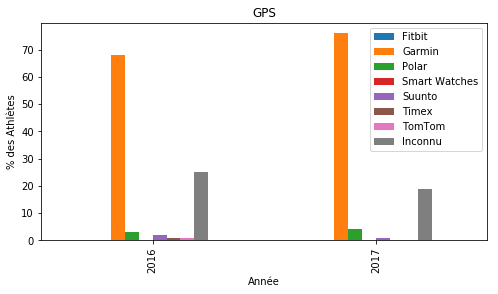

In [7]:
ax = df.plot.bar(title='GPS',figsize=(8, 4))
ax.set_xlabel('Année')
ax.set_ylabel('% des Athlètes')